<a href="https://colab.research.google.com/github/kaduoliveira83/estatistica_para_datascience/blob/main/Classifica%C3%A7%C3%A3o_com_Na%C3%AFve_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução ao modelo Naïve Bayes





## *   Dados desbalanceados 

*  O conjunto de dados apresentou um desbaslanceamento, o que provocou um baixo desempenho  do modelo proposto.
*   Serão propostas técnicas de Amostragem e Subamostragem para melhoria de desempenho.





# Importação das principais de bibliotecas

In [ ]:
import pandas as pd 
import random
import numpy as np

In [ ]:
dataset = pd.read_csv ('/content/drive/MyDrive/AULAS IA/credit_data.csv')

In [ ]:
dataset.shape

(2000, 5)

In [ ]:
dataset.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [ ]:
dataset.dropna(inplace=True)
dataset.shape

(1997, 5)

In [ ]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


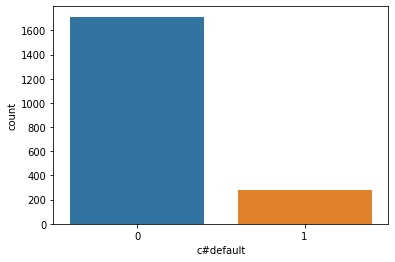

In [ ]:
sns.countplot(dataset['c#default']);

** **É possível notar que há uma desigualdade muito grande entre as duas classes** **

In [ ]:
X = dataset.iloc[:,1:4].values

In [ ]:
X.shape

(1997, 3)

In [ ]:
X

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [ ]:
y = dataset.iloc[:,4].values

In [ ]:
y.shape

(1997,)

In [ ]:
y

array([0, 0, 0, ..., 1, 0, 0])

# Base de treinamento e teste 




In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size = 0.2, stratify = y)

In [ ]:
X_treinamento.shape, y_treinamento.shape

((1597, 3), (1597,))

In [ ]:
X_teste.shape, y_teste.shape

((400, 3), (400,))

In [ ]:
np.unique(y, return_counts=True)

(array([0, 1]), array([1714,  283]))

In [ ]:
1714 / len(dataset), 283 / len(dataset)

(0.8582874311467201, 0.14171256885327993)

In [ ]:
np.unique(y_treinamento, return_counts=True)

(array([0, 1]), array([1371,  226]))

In [ ]:
226 / len(y_treinamento)

0.14151534126487164

In [ ]:
np.unique(y_teste, return_counts=True)

(array([0, 1]), array([343,  57]))

In [ ]:
57 / len(y_teste)

0.1425

# Classificação com Naïves Bayes 

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
modelo = GaussianNB()

modelo.fit (X_treinamento, y_treinamento)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
previsoes = modelo.predict (X_teste)

In [ ]:
previsoes

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
y_teste

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# Comparativo entre treino e teste do Naïves Bayes

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score (previsoes, y_teste)

0.9225

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(previsoes, y_teste)

In [ ]:
cm

array([[340,  28],
       [  3,  29]])

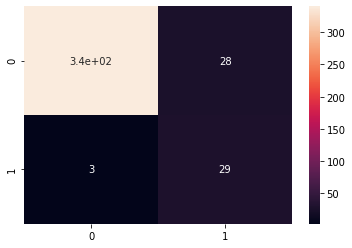

In [ ]:
sns.heatmap(cm, annot= True);

In [ ]:
(336 + 32) / (336 + 25 + 7 + 32)

Percentual de acerto de pessoal que pagam o empréstimo 

In [ ]:
336 / (336 + 25)

Percentual de acerto para pessoas que não pagam o empréstimo

In [ ]:
32 / (32 + 7)

Perdas: 5.000 - Clientes não pagadores: 1.000

In [ ]:
1000 * 18 / 100

In [ ]:
180 * 5000

# Técnicas de Amostragem e Amostragem 

*   Melhorar o desempenho para clientes não pagantes 




## Subamostragem (undersampling) 


In [ ]:
from imblearn.under_sampling import TomekLinks

In [ ]:
tl = TomekLinks(sampling_strategy='majority')
X_under, y_under = tl.fit_sample(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_under.shape, y_under.shape

((1897, 3), (1897,))

In [ ]:
np.unique(y, return_counts=True)

(array([0, 1]), array([1714,  283]))

In [ ]:
np.unique (y_under,return_counts= True)

(array([0, 1]), array([1614,  283]))

In [ ]:
X_treinamento_u, X_teste_u, y_treinamento_u, y_teste_u = train_test_split(X_under,
                                                                          y_under,
                                                                          test_size=0.2,
                                                                          stratify=y_under)
X_treinamento_u.shape, X_teste_u.shape

((1517, 3), (380, 3))

In [ ]:
modelo_u = GaussianNB()
modelo_u.fit(X_treinamento_u, y_treinamento_u)
previsoes_u = modelo_u.predict(X_teste_u)
accuracy_score(previsoes_u, y_teste_u)

0.9184210526315789

In [ ]:
cm_u = confusion_matrix(previsoes_u, y_teste_u)
cm_u

array([[317,  25],
       [  6,  32]])

In [ ]:
315 / (315 + 26)

0.9237536656891495

In [ ]:
31 / (31 + 8)

0.7948717948717948

# Sobreamostragem (oversampling) - SMOTE

In [48]:
from imblearn.over_sampling import SMOTE

In [49]:
smote = SMOTE(sampling_strategy='minority')
X_over, y_over = smote.fit_sample(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [50]:
X_over.shape, y_over.shape

((3428, 3), (3428,))

In [51]:
np.unique(y, return_counts=True)

(array([0, 1]), array([1714,  283]))

In [52]:
np.unique(y_over, return_counts=True)

(array([0, 1]), array([1714, 1714]))

In [53]:
X_treinamento_o, X_teste_o, y_treinamento_o, y_teste_o = train_test_split(X_over, y_over,
                                                                          test_size = 0.2,
                                                                          stratify=y_over)

In [54]:
X_treinamento_o.shape, X_teste_o.shape

((2742, 3), (686, 3))

In [55]:
modelo_o = GaussianNB()
modelo_o.fit(X_treinamento_o, y_treinamento_o)
previsoes_o = modelo_o.predict(X_teste_o)
accuracy_score(previsoes_o, y_teste_o)

0.9110787172011662

In [56]:
cm_o = confusion_matrix(previsoes_o, y_teste_o)
cm_o

array([[293,  11],
       [ 50, 332]])

In [57]:
305 / (305 + 19)

0.941358024691358

In [58]:
324 / (324 + 38)

0.8950276243093923

In [59]:
# Perdas: 5.000
# Cliente não pagadores: 1.000
1000 * 11 / 100

110.0

In [60]:
110 * 5000

550000

In [61]:
900000 - 550000

350000

# Considerações finais

*  Oversampling ser mostrou com melhor resultado
*  É necessário outros teste para evitar a perda financeira 

